In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
BASE_DIR = '../dataset'
TRAIN_DIR = os.path.join(BASE_DIR, 'train')
TEST_DIR = os.path.join(BASE_DIR, 'test')
VAL_DIR = os.path.join(BASE_DIR, 'val')

IMG_SIZE = 224 
CATEGORIES = ["NORMAL", "PNEUMONIA"]
print("Paths set successfully!")

Paths set successfully!


# The Loading Function 
# This function reads images, resizes them, and converts them to a format the AI can understand.

In [9]:
def load_data(directory, sample_limit=None):

    data = []
    
    for category in CATEGORIES:
        path = os.path.join(directory, category)
        class_num = CATEGORIES.index(category) # 0 or 1
        
        # Determine label text for printing
        label_name = "Pneumonia" if class_num == 1 else "Normal"
        print(f"Loading {label_name} cases...")
        
        count = 0
        for img in os.listdir(path):
            try:
                # Read image in grayscale (X-rays are B&W)
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                
                # Resize to standard size (224x224)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                
                # Normalize pixels (0-255 -> 0-1)
                # This helps the AI learn faster
                new_array = new_array / 255.0
                
                data.append([new_array, class_num])
                
                count += 1
                if sample_limit and count >= sample_limit:
                    break
            except Exception as e:
                pass
                
    return np.array(data, dtype=object)

print("Function defined.")

Function defined.


# Load & Visualize 
# Here we loading a small batch to make sure everything works before loading the thousands of images.

Loading Normal cases...
Loading Pneumonia cases...


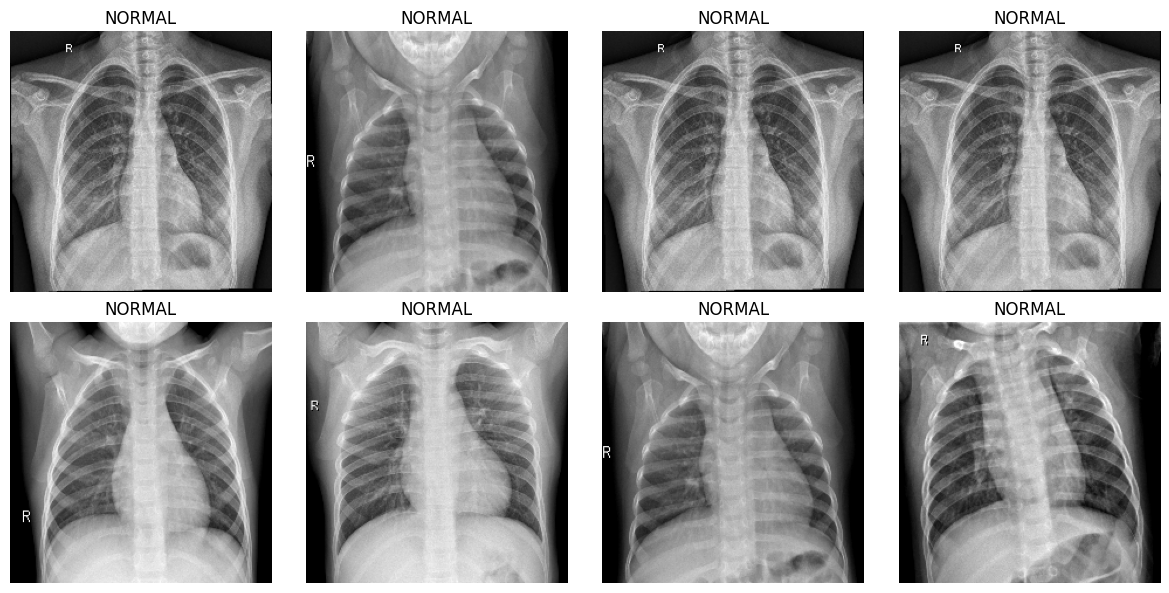

Success! Image shape is: (224, 224)


In [10]:
train_data = load_data(TRAIN_DIR, sample_limit=10)

# Shuffle the data (so we don't just see all Normal then all Pneumonia)
import random
random.shuffle(train_data)

plt.figure(figsize=(12, 6))
for i in range(8): # Show top 8 images
    plt.subplot(2, 4, i+1)
    plt.imshow(train_data[i][0], cmap='gray')
    
    label = "PNEUMONIA" if train_data[i][1] == 1 else "NORMAL"
    plt.title(label)
    plt.axis('off')

plt.tight_layout()
plt.show()

print(f"Success! Image shape is: {train_data[0][0].shape}")